In [1]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

import numpy as np
import pandas as pd
import os
import sys

mach='Mac'

if mach=='Mac':
    pathy=pathMAC
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')
if mach=='pc':
    pathy=pathpc
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')

import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from SCF_M_point import Mean_field_M
import pickle
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=True)
import Eq_time_corrs_M_MF

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
Nsamp=4
theta=1.05*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one is normalized
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0019690990447998047  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (16, 1)
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0019130706787109375  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling r

In [3]:

fullpath=path_data+'/g3_12_2023-04-11-18-56-55/g3_12_1.05/data_mu_0_g2_3.pkl'
# Read the object from the pickle file
with open(fullpath, 'rb') as file:
    B1 = pickle.load(file)


In [4]:


import importlib     
importlib.reload(Eq_time_corrs_M_MF) #

<module 'Eq_time_corrs_M_MF' from '/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure/Mods_corr/Eq_time_corrs_M_MF.py'>

In [5]:
trans_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 'a', 'trans', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
the shape of the index qpM array (72, 17) compare to  72
the shape of the index qpM array (72, 17) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
7 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
calculating ten

In [6]:

# phiT=0
# T=0.001
# res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )

In [7]:
# bs=lq.boundary()
# [GM1,GM2]=lq.GMvec
# mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
# for mult in mults:
#     plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

# plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t, marker='h', s=50, cmap='Blues_r')
# plt.colorbar()

In [8]:
phiT=0.1
T=0.001
res_tv2=trans_corr.MF_corr_eq_back( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.4482760429382324


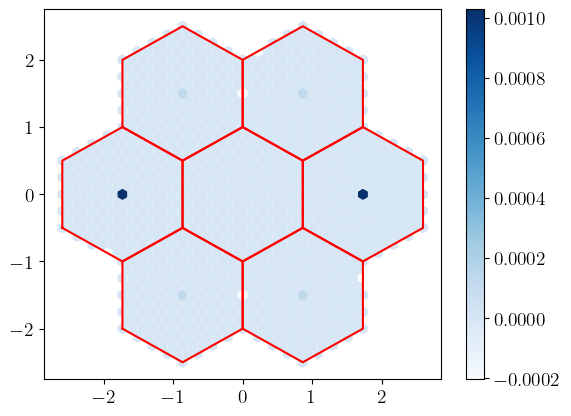

In [9]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [14]:
phiT=1
T=0.001
res_tv2=trans_corr.MF_corr_eq_back( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.44565606117248535


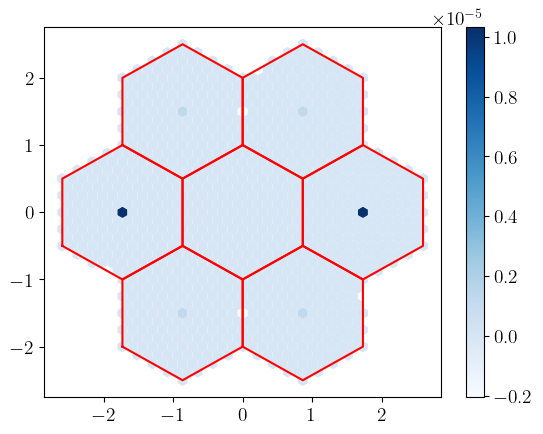

In [15]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [16]:
phiT=1
T=0.001
res_tv2=trans_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.07087397575378418


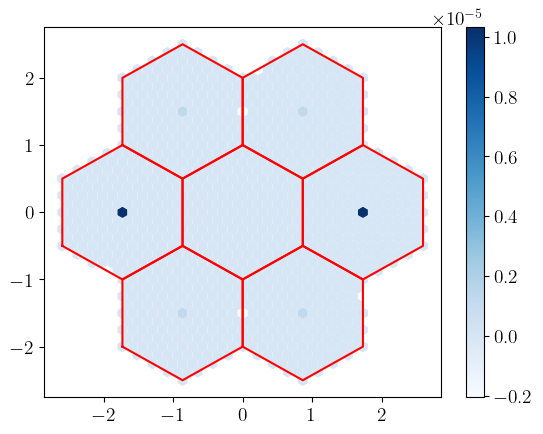

In [17]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [18]:
phiT=1
T=0.001
res_phi_trans=[]
res_phi_trans_back=[]
Phis=np.linspace(0,0.001, 64)
for phiT in Phis:
    # res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_trans.append(res_t)
    
    res_t=trans_corr.MF_corr_eq_back( args = (0.0,T,phiT, False) )
    res_phi_trans_back.append(res_t)

starting bubble.......
time for bubble... 0.40941691398620605
starting bubble.......
time for bubble... 0.4668080806732178
starting bubble.......
time for bubble... 0.4469010829925537
starting bubble.......
time for bubble... 0.4204559326171875
starting bubble.......
time for bubble... 0.43131518363952637
starting bubble.......
time for bubble... 0.427670955657959
starting bubble.......
time for bubble... 0.4236900806427002
starting bubble.......
time for bubble... 0.4364919662475586
starting bubble.......
time for bubble... 0.4653191566467285
starting bubble.......
time for bubble... 0.4493529796600342
starting bubble.......
time for bubble... 0.45280981063842773
starting bubble.......
time for bubble... 0.44527292251586914
starting bubble.......
time for bubble... 0.43892812728881836
starting bubble.......
time for bubble... 0.4389679431915283
starting bubble.......
time for bubble... 0.44030117988586426
starting bubble.......
time for bubble... 0.4331991672515869
starting bubble....

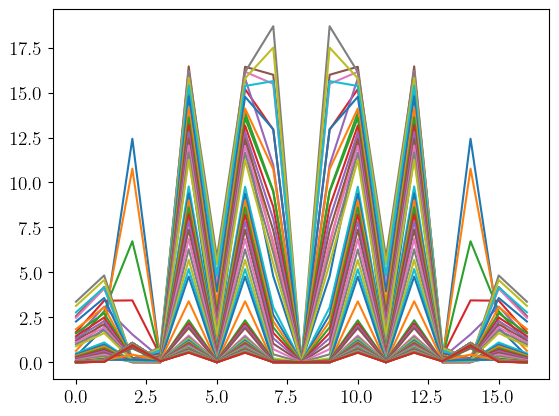

-2.598076211353314 -3.1086244689504383e-15
-1.7320508075688752 -1.5000000000000033
-1.7320508075688759 -2.220446049250313e-15
-1.7320508075688763 1.4999999999999991
-0.8660254037844393 -1.4999999999999996
-0.8660254037844379 -1.1102230246251565e-15
-0.8660254037844384 1.5000000000000002
2.220446049250313e-16 -1.4999999999999987
0.0 0.0
-2.886579864025407e-15 1.5
0.8660254037844395 -1.4999999999999978
0.8660254037844387 0.0
0.8660254037844358 1.5
1.7320508075688787 -1.499999999999997
1.7320508075688774 0.0
1.7320508075688745 1.5
2.598076211353316 0.0


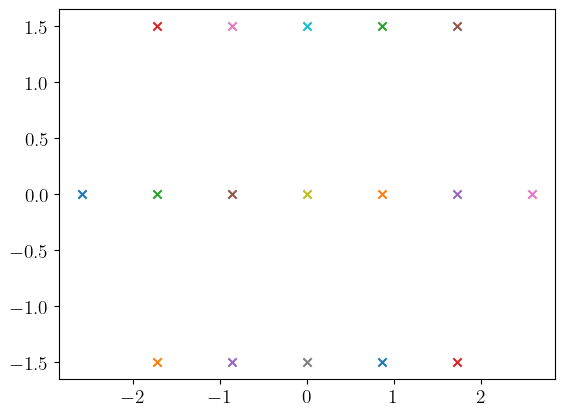

In [19]:


bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
peaks=[]
for i,phiT in enumerate(Phis):

    plt.plot(np.abs(res_phi_trans_back[i])[trans_corr.IGinq])
    peaks.append(np.abs(res_phi_trans_back[i])[trans_corr.IGinq])
plt.show()
for i in trans_corr.IGinq:
    print(B1.latt.KX[i],B1.latt.KY[i])
    plt.scatter([B1.latt.KX[i]],[B1.latt.KY[i]], marker='x')


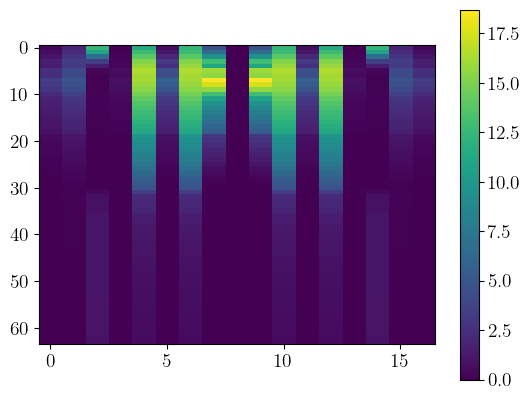

In [20]:
plt.imshow(peaks, aspect=1/5)
plt.colorbar()

In [21]:
phiT=1
T=0.001
res_phi_trans=[]
res_phi_trans_back=[]
Phis=np.linspace(0,0.0011, 12)
for phiT in Phis:
    res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    res_phi_trans.append(res_t)
    
    res_t=trans_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )
    res_phi_trans_back.append(res_t)

starting bubble.......
time for bubble... 8.096329927444458
starting bubble.......
time for bubble... 0.0669248104095459
starting bubble.......
time for bubble... 8.579773902893066
starting bubble.......
time for bubble... 0.07018232345581055
starting bubble.......
time for bubble... 8.563682079315186
starting bubble.......
time for bubble... 0.07021903991699219
starting bubble.......
time for bubble... 8.570342063903809
starting bubble.......
time for bubble... 0.06528997421264648
starting bubble.......
time for bubble... 8.538808107376099
starting bubble.......
time for bubble... 0.06985116004943848
starting bubble.......
time for bubble... 8.708669900894165
starting bubble.......
time for bubble... 0.06958889961242676
starting bubble.......
time for bubble... 8.756000995635986
starting bubble.......
time for bubble... 0.07379913330078125
starting bubble.......
time for bubble... 8.546348094940186
starting bubble.......
time for bubble... 0.06592798233032227
starting bubble.......
ti

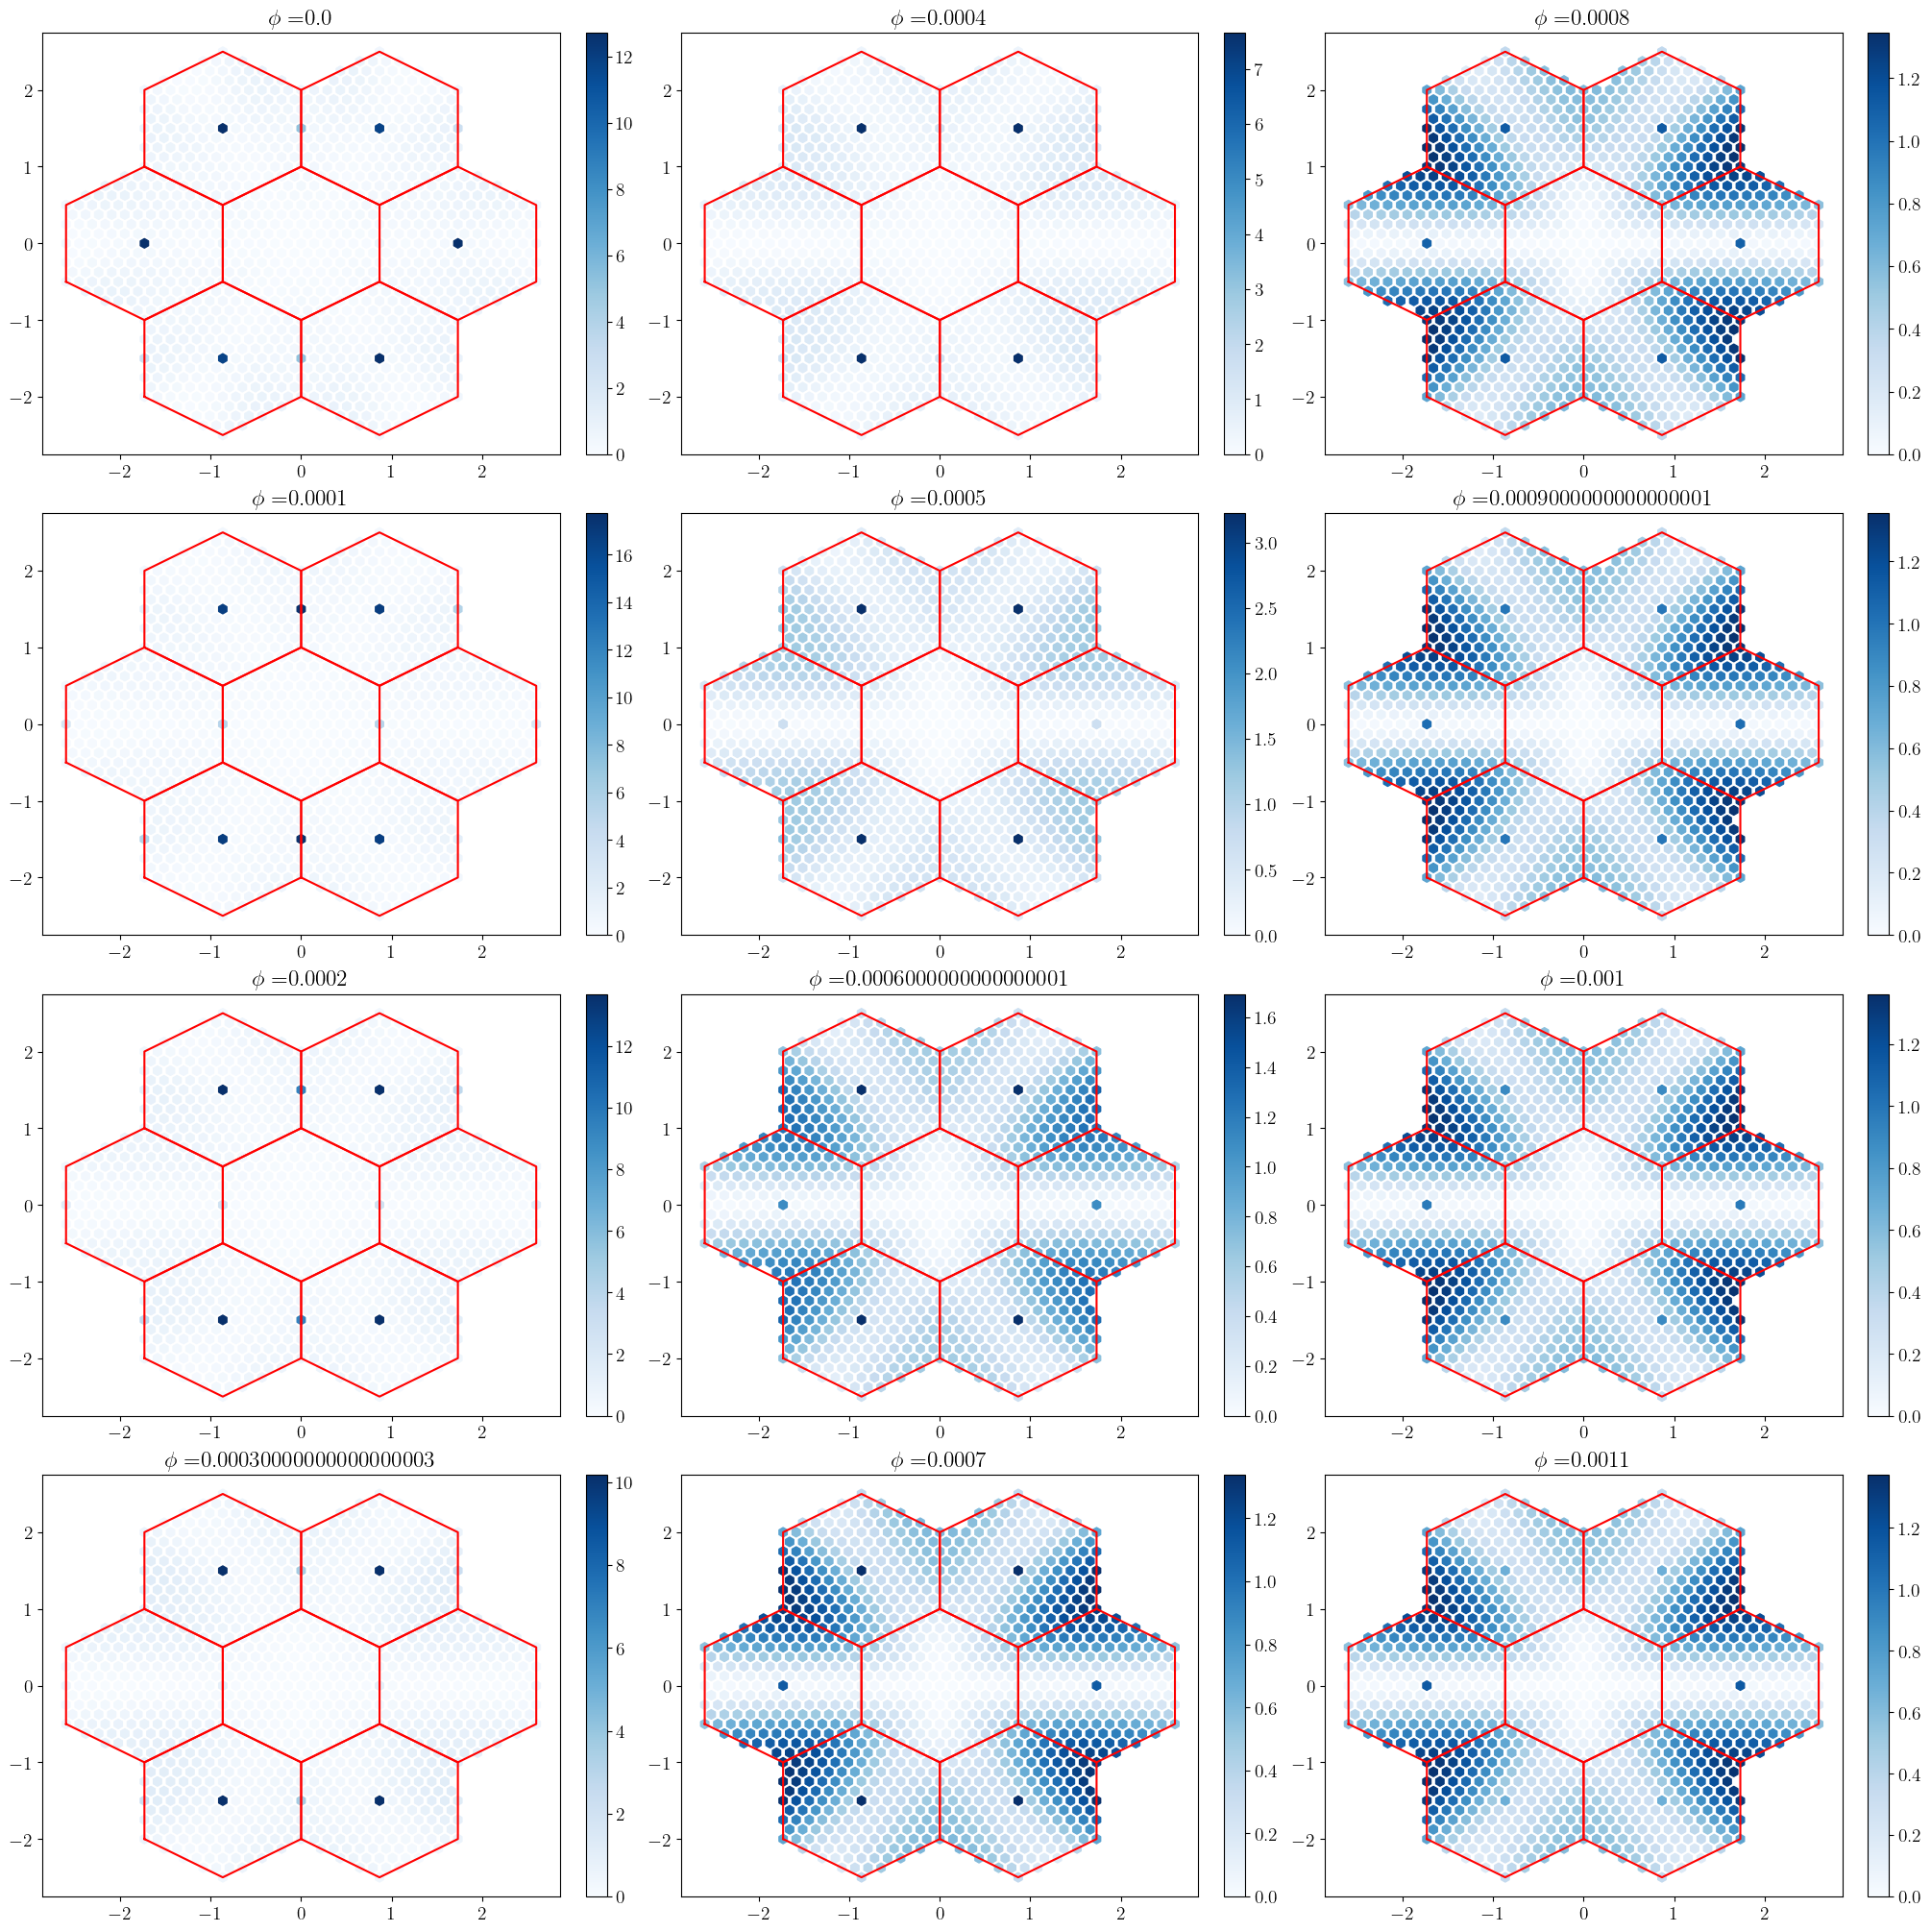

In [22]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20), layout="constrained")


bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for i,phiT in enumerate(Phis):
    row = int( i % 4)
    col = int( (i - row) / 4 )
    for mult in mults:
        axs[row, col].plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

    
    axs[row, col].set_title(r'$\phi=$'+str(phiT))
    # plt.scatter(B1.latt.KX,B1.latt.KY, c=res_phi_trans[i]+np.real(res_phi_trans_back[i]), marker='h', s=50, cmap='Blues_r')
    sc=axs[row, col].scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_phi_trans_back[i])+np.real(res_phi_trans[i]), marker='h', s=50, cmap='Blues')
    plt.colorbar(sc, ax = axs[row, col])
plt.show()

In [22]:
phiT=0
T=0.001
res_t0=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 8.295928955078125


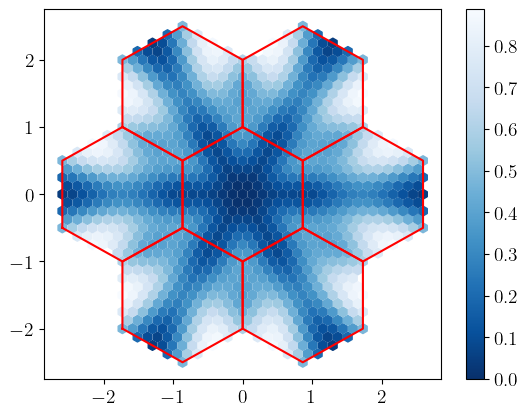

In [23]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t0, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [24]:
phiT=0
T=0.01
res_t02=trans_corr.corr_eq( args = (0.0,T,False) )

starting bubble.......
time for bubble... 3.2504827976226807


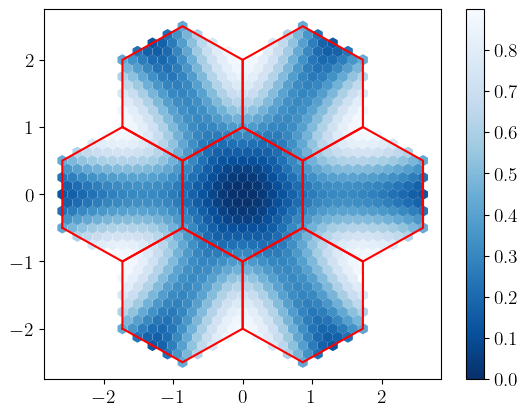

In [72]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t02, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [23]:
subl_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 's', 'subl', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
the shape of the index qpM array (72, 17) compare to  72
the shape of the index qpM array (72, 17) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
7 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
calculating ten

In [38]:
phiT=0
T=0.001
res_subl=subl_corr.MF_corr_eq( args = (0.0,T,phiT, False) )


starting bubble.......
time for bubble... 7.9670820236206055


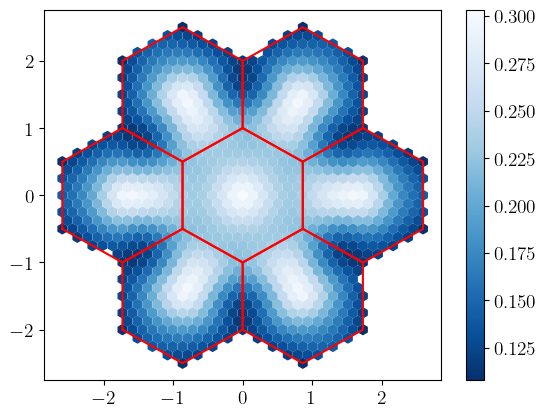

In [39]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_subl, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [40]:
phiT=1
T=0.001
res_subl=subl_corr.MF_corr_eq_v2( args = (0.0,T,phiT, False) )


starting bubble.......
time for bubble... 5.370378017425537


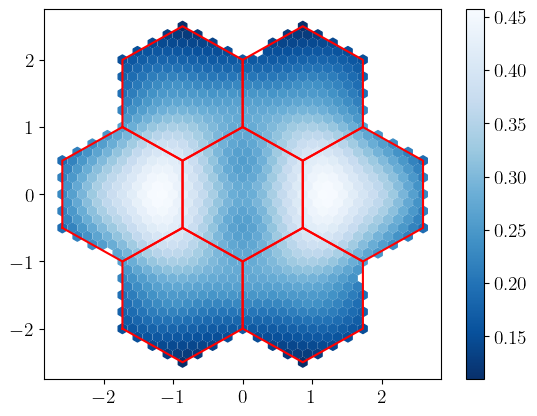

In [41]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_subl, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [42]:
phiT=0.01
T=0.001
res_tv2=subl_corr.MF_corr_eq_back( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.454941987991333


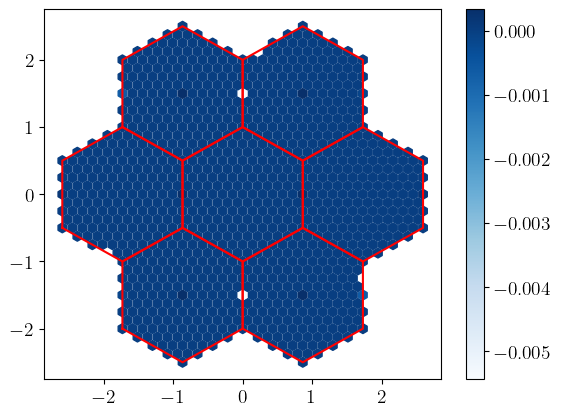

In [43]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [30]:
phiT=1
T=0.001
res_phi_subl=[]
res_phi_subl_back=[]
Phis=np.linspace(0,0.0011, 12)
for phiT in Phis:
    # res_subl=subl_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_subl.append(res_subl)
    
    res_subl=subl_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )
    res_phi_subl_back.append(res_subl)

starting bubble.......
time for bubble... 0.07464885711669922
starting bubble.......
time for bubble... 0.07142925262451172
starting bubble.......
time for bubble... 0.07841873168945312
starting bubble.......
time for bubble... 0.07085800170898438
starting bubble.......
time for bubble... 0.0709848403930664
starting bubble.......
time for bubble... 0.07006096839904785
starting bubble.......
time for bubble... 0.0666191577911377
starting bubble.......
time for bubble... 0.06680798530578613
starting bubble.......
time for bubble... 0.07885313034057617
starting bubble.......
time for bubble... 0.08008289337158203
starting bubble.......
time for bubble... 0.0705108642578125
starting bubble.......
time for bubble... 0.06758809089660645


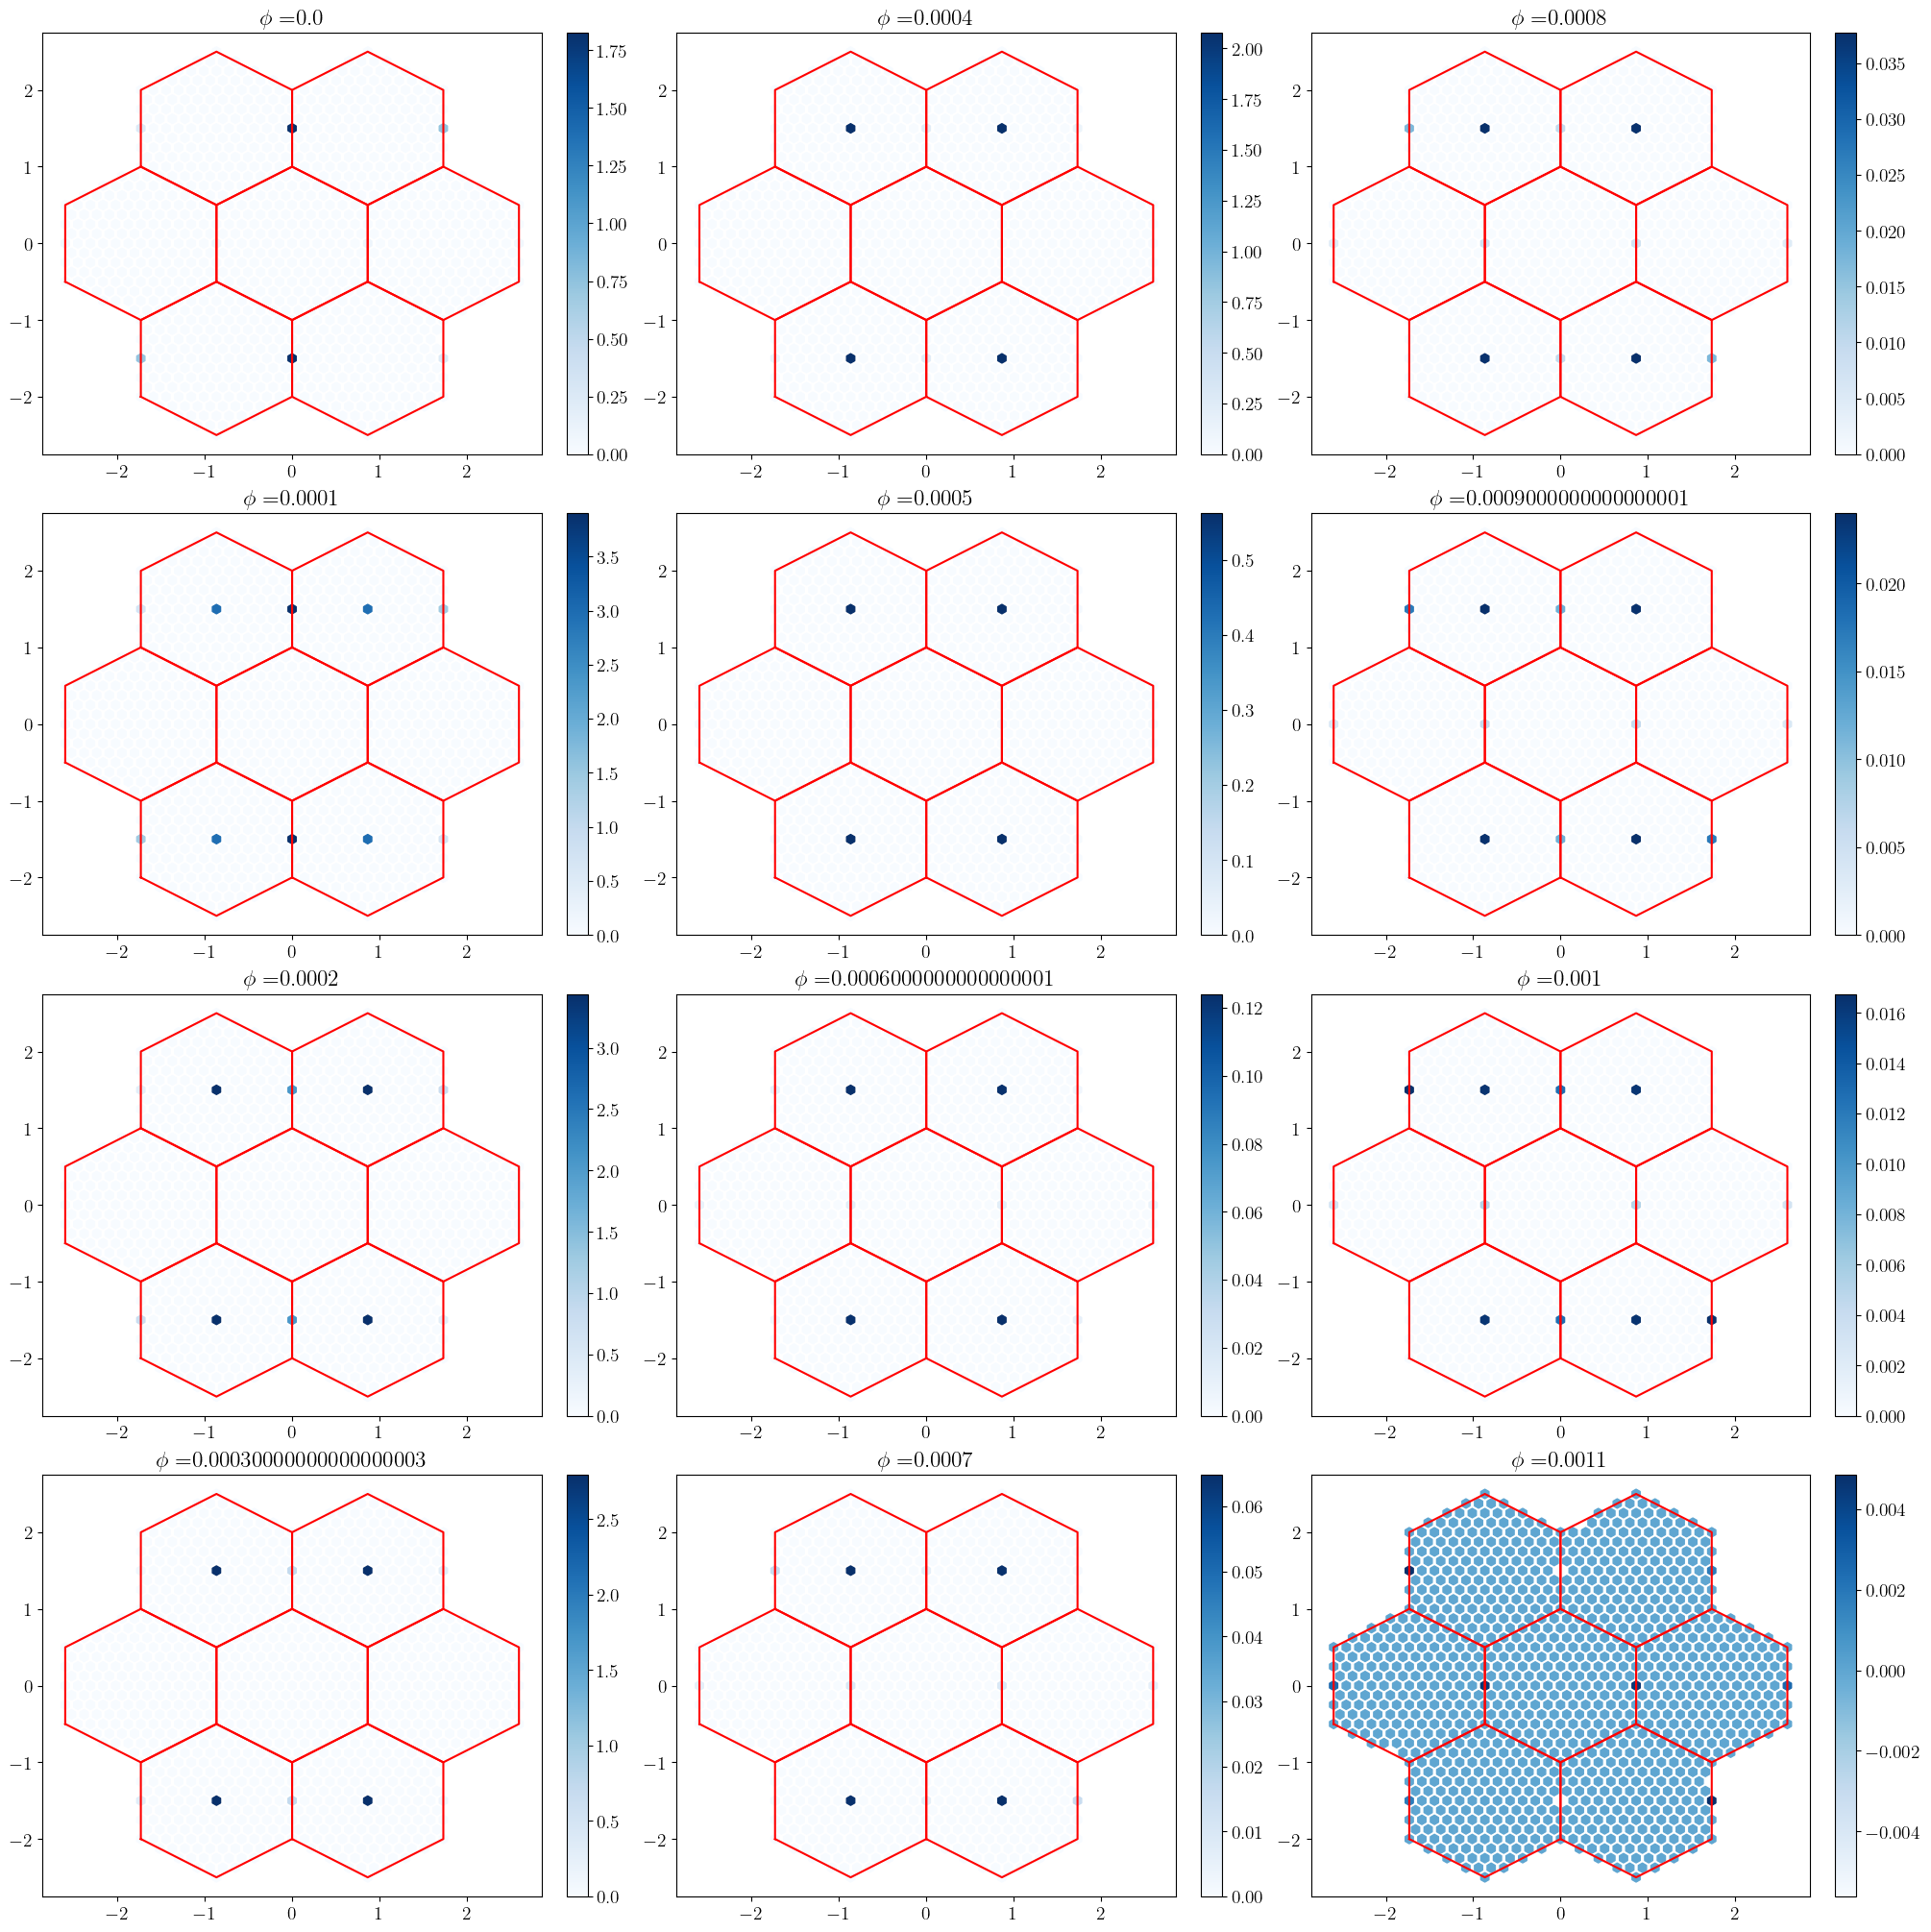

In [31]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20), layout="constrained")


bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for i,phiT in enumerate(Phis):
    row = int( i % 4)
    col = int( (i - row) / 4 )
    for mult in mults:
        axs[row, col].plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

    axs[row, col].set_title(r'$\phi=$'+str(phiT))
    # plt.scatter(B1.latt.KX,B1.latt.KY, c=res_phi_trans[i]+np.real(res_phi_trans_back[i]), marker='h', s=50, cmap='Blues_r')
    sc=axs[row, col].scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_phi_subl_back[i]), marker='h', s=50, cmap='Blues')
    plt.colorbar(sc, ax = axs[row, col])
plt.show()

In [32]:
phiT=0
T=0.01
res0=subl_corr.MF_corr_eq((0.0,T,phiT, False))

starting bubble.......
time for bubble... 7.974236965179443


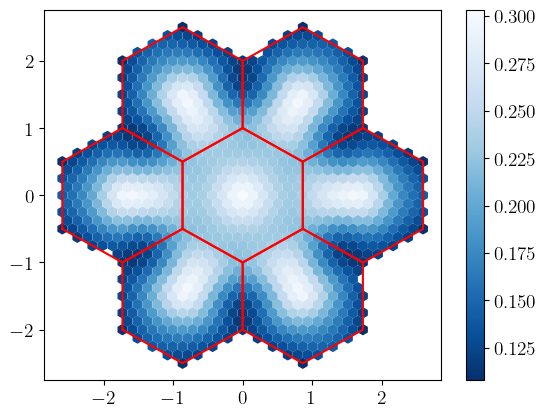

In [33]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res0, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [34]:
phiT=1
T=0.001
res_phi_subl=[]
res_phi_subl_back=[]
Phis=np.linspace(0,0.1, 64)
for phiT in Phis:
    # res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_trans.append(res_t)
    
    res_t=subl_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )
    res_phi_subl_back.append(res_t)

starting bubble.......
time for bubble... 0.0827798843383789
starting bubble.......
time for bubble... 0.07127094268798828
starting bubble.......
time for bubble... 0.07080984115600586
starting bubble.......
time for bubble... 0.06841778755187988
starting bubble.......
time for bubble... 0.07011294364929199
starting bubble.......
time for bubble... 0.07042217254638672
starting bubble.......
time for bubble... 0.06882214546203613
starting bubble.......
time for bubble... 0.0661630630493164
starting bubble.......
time for bubble... 0.07003021240234375
starting bubble.......
time for bubble... 0.07298564910888672
starting bubble.......
time for bubble... 0.06630396842956543
starting bubble.......
time for bubble... 0.06569981575012207
starting bubble.......
time for bubble... 0.07054996490478516
starting bubble.......
time for bubble... 0.06703996658325195
starting bubble.......
time for bubble... 0.06622529029846191
starting bubble.......
time for bubble... 0.06586289405822754
starting b

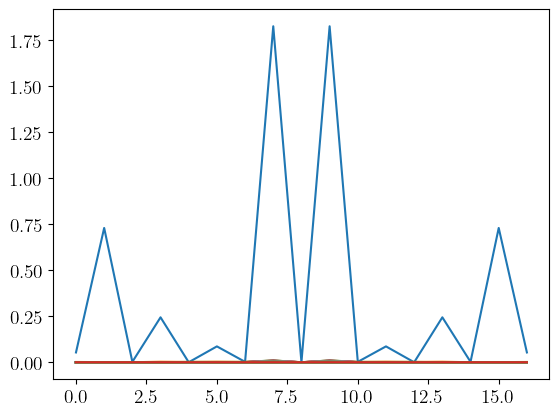

-2.598076211353314 -3.1086244689504383e-15
-1.7320508075688752 -1.5000000000000033
-1.7320508075688759 -2.220446049250313e-15
-1.7320508075688763 1.4999999999999991
-0.8660254037844393 -1.4999999999999996
-0.8660254037844379 -1.1102230246251565e-15
-0.8660254037844384 1.5000000000000002
2.220446049250313e-16 -1.4999999999999987
0.0 0.0
-2.886579864025407e-15 1.5
0.8660254037844395 -1.4999999999999978
0.8660254037844387 0.0
0.8660254037844358 1.5
1.7320508075688787 -1.499999999999997
1.7320508075688774 0.0
1.7320508075688745 1.5
2.598076211353316 0.0


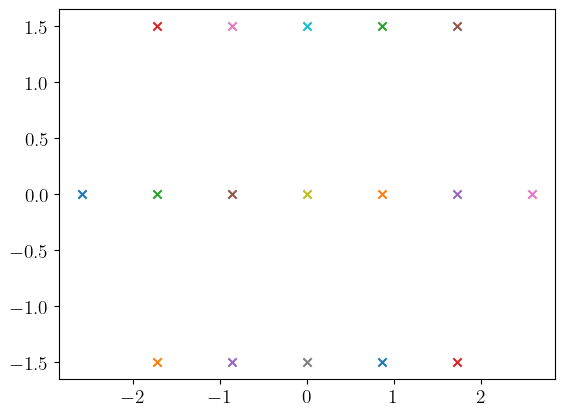

In [35]:


bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
peaks=[]
for i,phiT in enumerate(Phis):

    plt.plot(np.abs(res_phi_subl_back[i])[subl_corr.IGinq])
    peaks.append(np.abs(res_phi_subl_back[i])[subl_corr.IGinq])
plt.show()
for i in subl_corr.IGinq:
    print(B1.latt.KX[i],B1.latt.KY[i])
    plt.scatter([B1.latt.KX[i]],[B1.latt.KY[i]], marker='x')


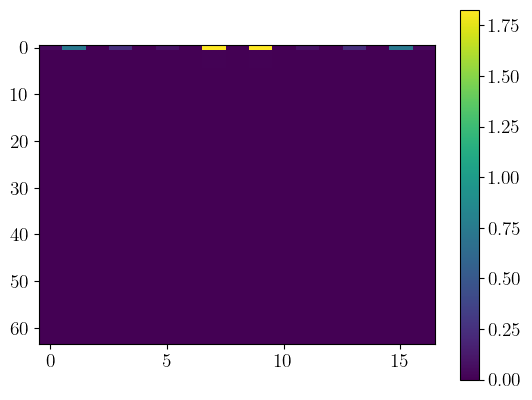

In [36]:
plt.imshow(peaks, aspect=1/5)
plt.colorbar()

In [44]:
long_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 'a', 'long', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
the shape of the index qpM array (72, 17) compare to  72
the shape of the index qpM array (72, 17) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
7 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
calculating ten

In [45]:
phiT=1
T=0.01
resLong=long_corr.MF_corr_eq((0.0,T,phiT, False))

starting bubble.......
time for bubble... 8.558535814285278


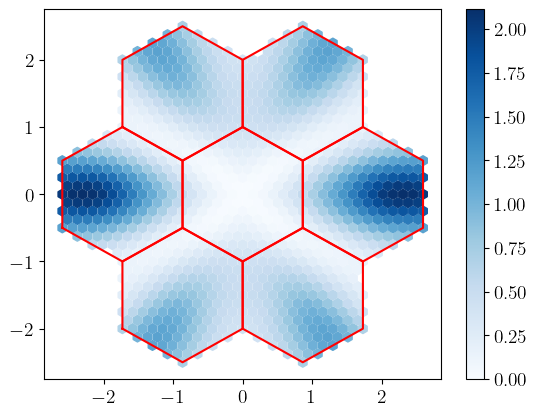

In [46]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=resLong, marker='h', s=50, cmap='Blues')
plt.colorbar()

In [47]:
phiT=0.01
T=0.001
res_tv2=long_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.08437037467956543


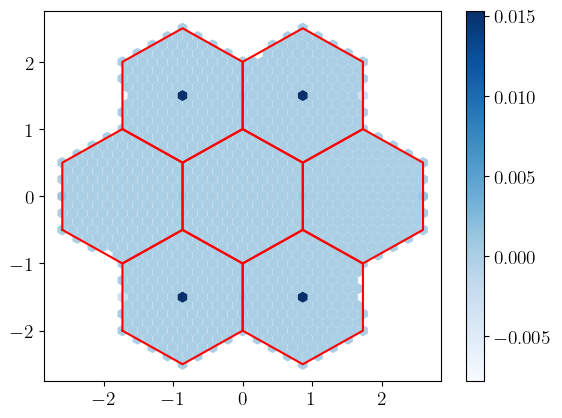

In [48]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

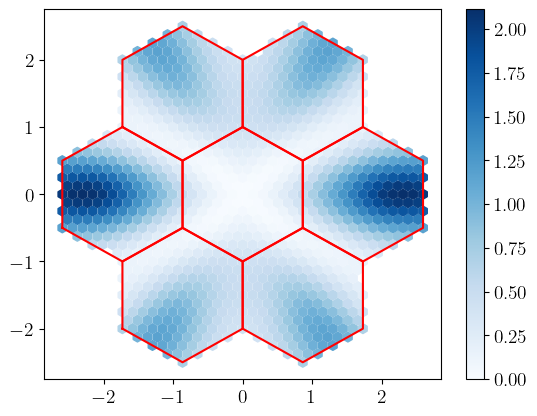

In [49]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=resLong+np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [50]:
phiT=1
T=0.001
res_phi_long=[]
res_phi_long_back=[]
Phis=np.linspace(0,0.0011, 12)
for phiT in Phis:
    # res_long=long_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_long.append(res_long)
    
    res_long=long_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )
    res_phi_long_back.append(res_long)

starting bubble.......
time for bubble... 0.06982612609863281
starting bubble.......
time for bubble... 0.06813883781433105
starting bubble.......
time for bubble... 0.06685590744018555
starting bubble.......
time for bubble... 0.07292318344116211
starting bubble.......
time for bubble... 0.06725668907165527
starting bubble.......
time for bubble... 0.06731390953063965
starting bubble.......
time for bubble... 0.06743502616882324
starting bubble.......
time for bubble... 0.0683751106262207
starting bubble.......
time for bubble... 0.06637692451477051
starting bubble.......
time for bubble... 0.06606197357177734
starting bubble.......
time for bubble... 0.06894111633300781
starting bubble.......
time for bubble... 0.07075190544128418


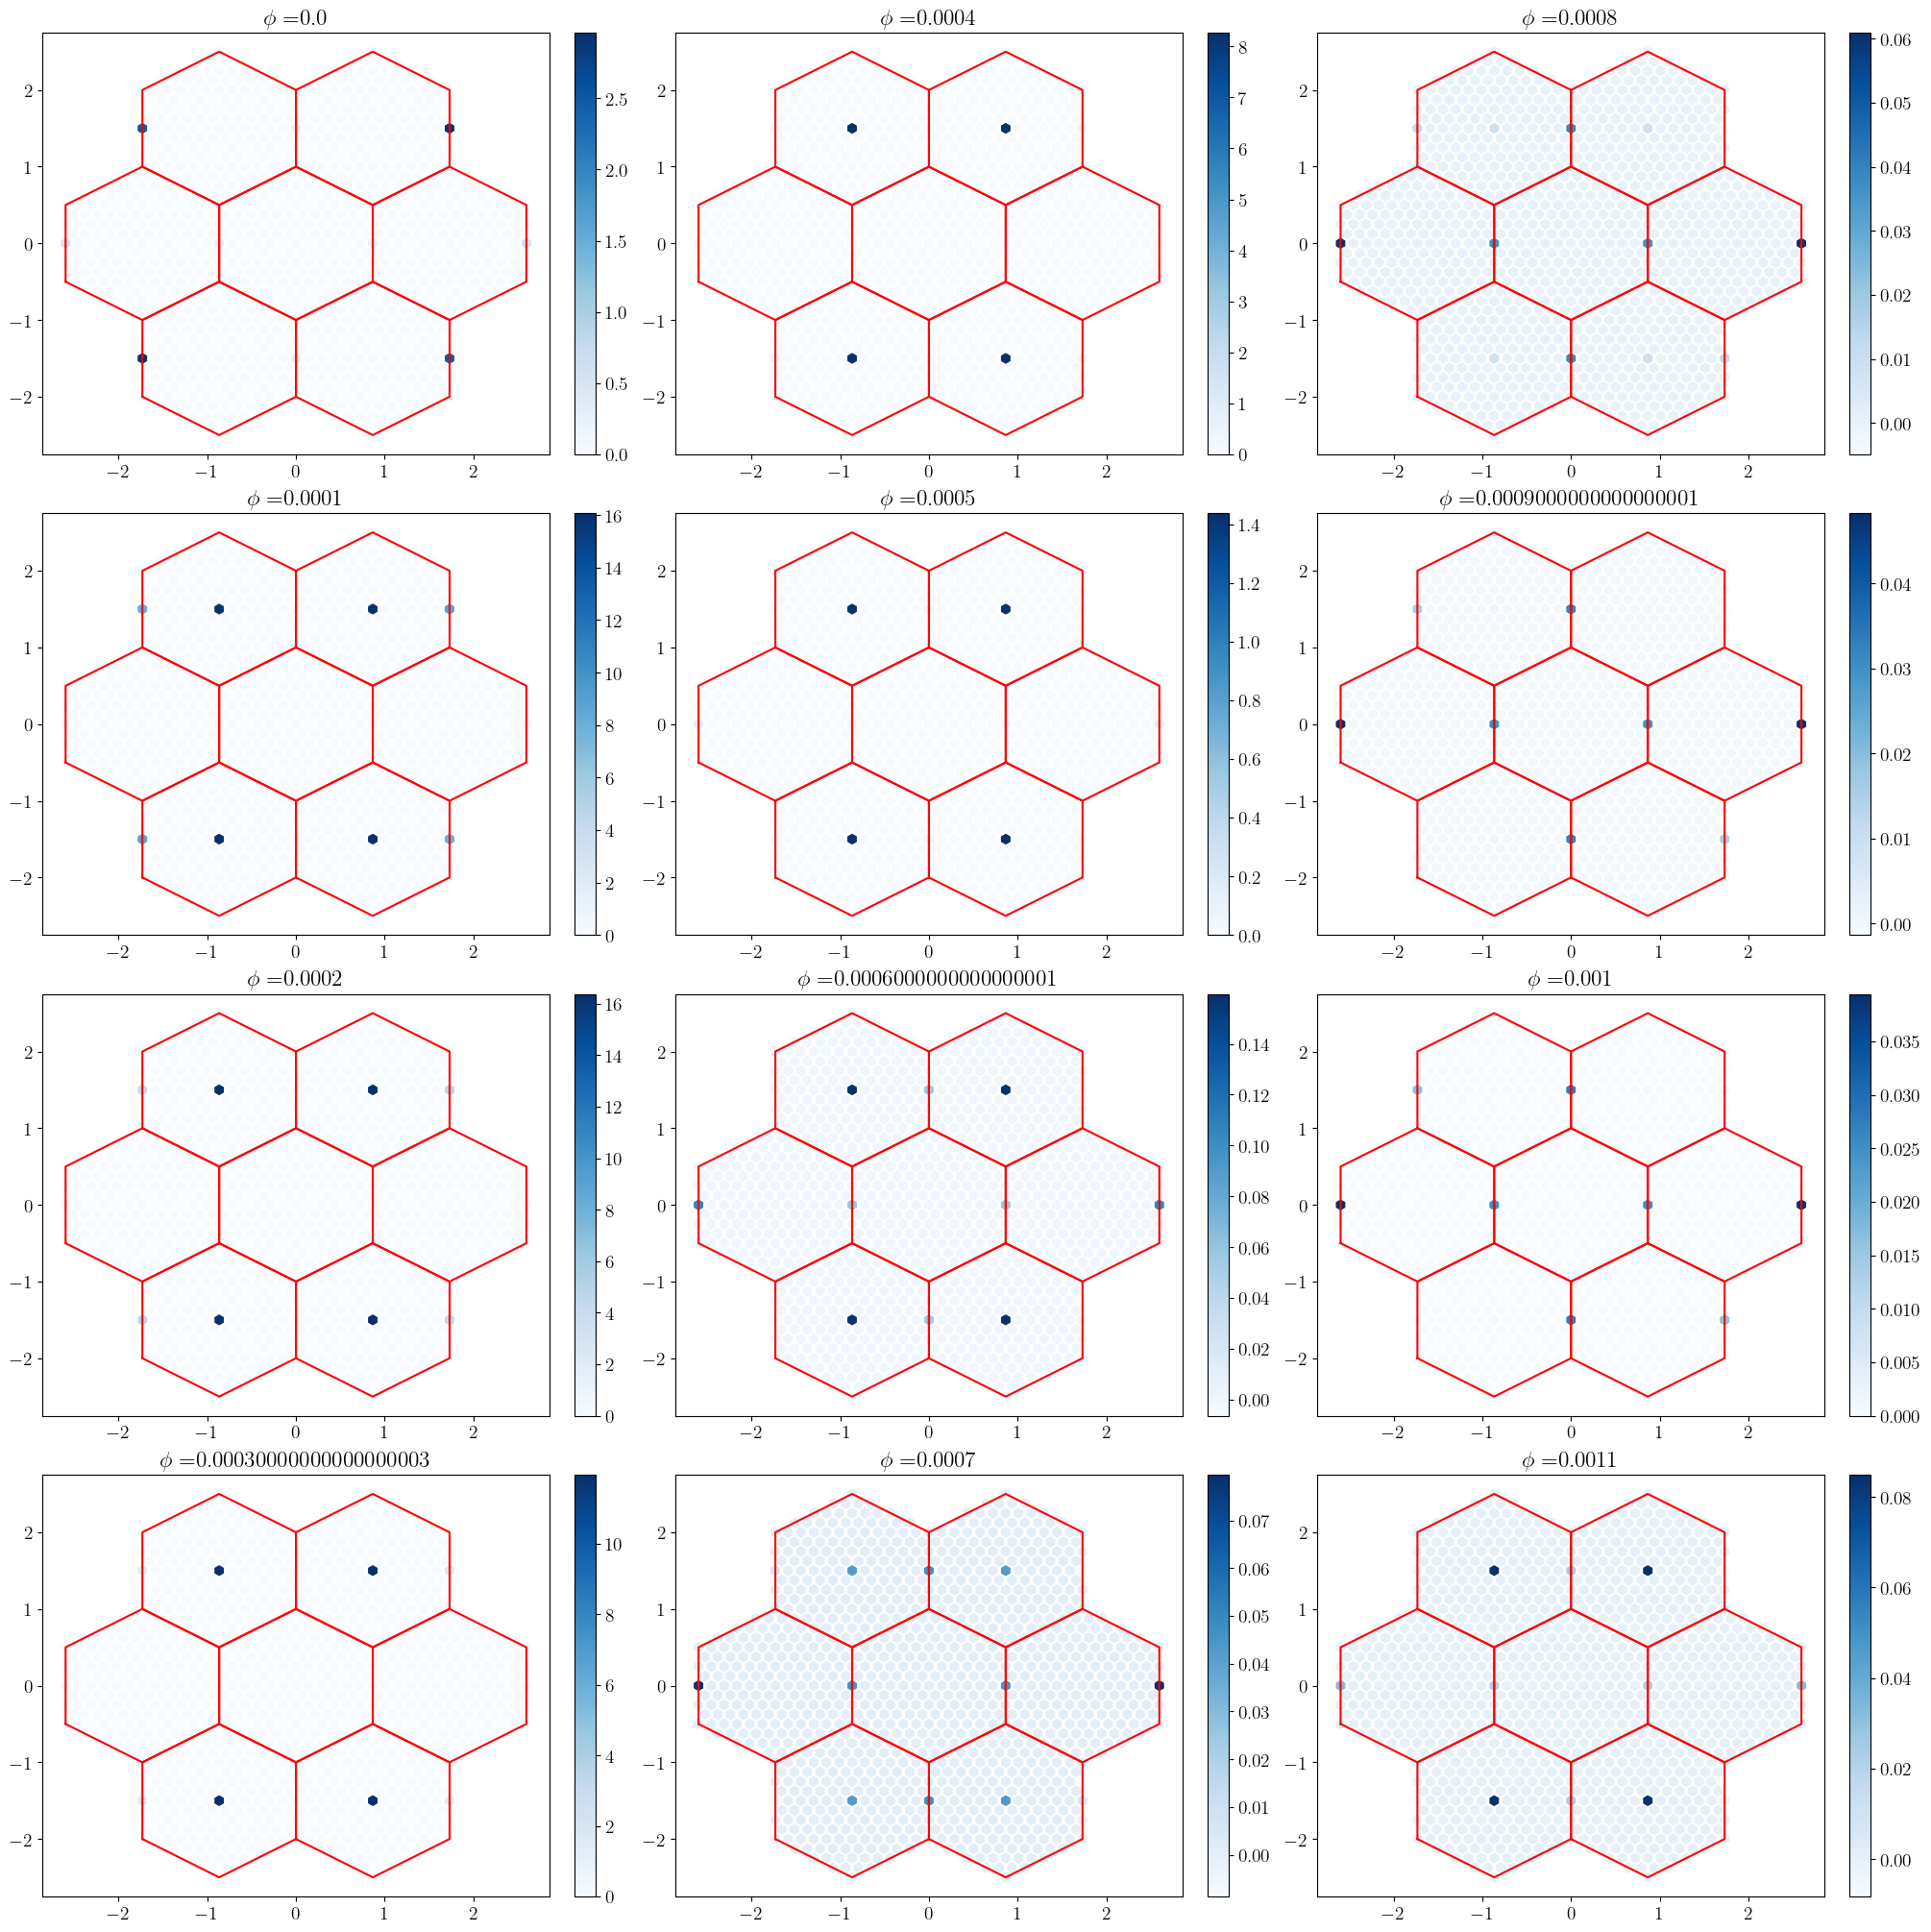

In [51]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20), layout="constrained")


bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for i,phiT in enumerate(Phis):
    row = int( i % 4)
    col = int( (i - row) / 4 )
    for mult in mults:
        axs[row, col].plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

    axs[row, col].set_title(r'$\phi=$'+str(phiT))
    # plt.scatter(B1.latt.KX,B1.latt.KY, c=res_phi_trans[i]+np.real(res_phi_trans_back[i]), marker='h', s=50, cmap='Blues_r')
    sc=axs[row, col].scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_phi_long_back[i]), marker='h', s=50, cmap='Blues')
    plt.colorbar(sc, ax = axs[row, col])
plt.show()

In [52]:

# import importlib     
# importlib.reload(Eq_time_corrs_M_MF) #

In [53]:
phiT=1
T=0.001
res_phi_long=[]
res_phi_long_back=[]
Phis=np.linspace(0,0.1, 64)
for phiT in Phis:
    # res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_trans.append(res_t)
    
    res_t=long_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )
    res_phi_long_back.append(res_t)

starting bubble.......
time for bubble... 0.08044791221618652
starting bubble.......
time for bubble... 0.07019901275634766
starting bubble.......
time for bubble... 0.07070517539978027
starting bubble.......
time for bubble... 0.06735372543334961
starting bubble.......
time for bubble... 0.0659329891204834
starting bubble.......
time for bubble... 0.06595778465270996
starting bubble.......
time for bubble... 0.07044672966003418
starting bubble.......
time for bubble... 0.06625199317932129
starting bubble.......
time for bubble... 0.06552672386169434
starting bubble.......
time for bubble... 0.06560015678405762
starting bubble.......
time for bubble... 0.06788778305053711
starting bubble.......
time for bubble... 0.06770801544189453
starting bubble.......
time for bubble... 0.06602978706359863
starting bubble.......
time for bubble... 0.06605410575866699
starting bubble.......
time for bubble... 0.07207608222961426
starting bubble.......
time for bubble... 0.07103800773620605
starting 

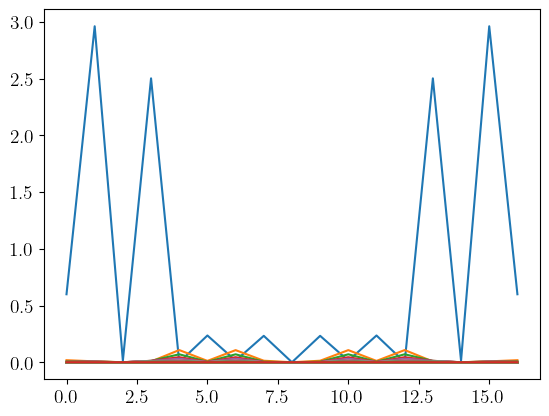

-2.598076211353314 -3.1086244689504383e-15
-1.7320508075688752 -1.5000000000000033
-1.7320508075688759 -2.220446049250313e-15
-1.7320508075688763 1.4999999999999991
-0.8660254037844393 -1.4999999999999996
-0.8660254037844379 -1.1102230246251565e-15
-0.8660254037844384 1.5000000000000002
2.220446049250313e-16 -1.4999999999999987
0.0 0.0
-2.886579864025407e-15 1.5
0.8660254037844395 -1.4999999999999978
0.8660254037844387 0.0
0.8660254037844358 1.5
1.7320508075688787 -1.499999999999997
1.7320508075688774 0.0
1.7320508075688745 1.5
2.598076211353316 0.0


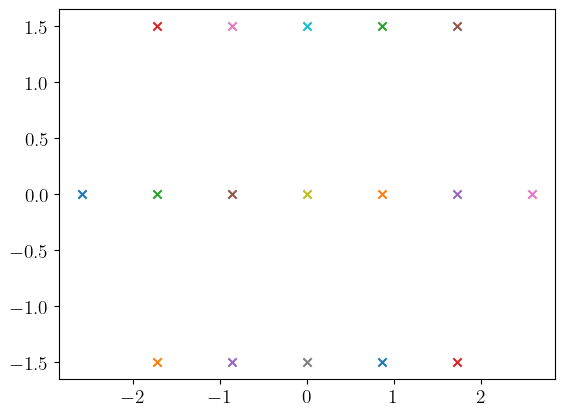

In [54]:


bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
peaks=[]
for i,phiT in enumerate(Phis):

    plt.plot(np.abs(res_phi_long_back[i])[long_corr.IGinq])
    peaks.append(np.abs(res_phi_long_back[i])[long_corr.IGinq])
plt.show()
for i in long_corr.IGinq:
    print(B1.latt.KX[i],B1.latt.KY[i])
    plt.scatter([B1.latt.KX[i]],[B1.latt.KY[i]], marker='x')

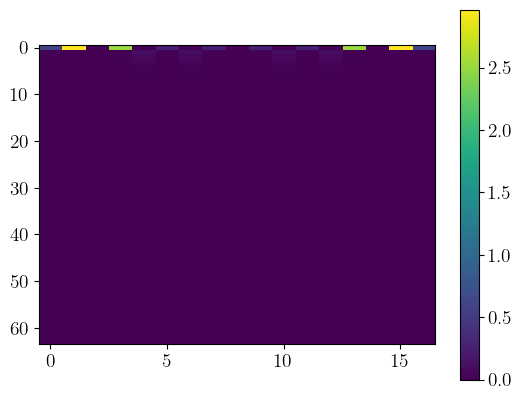

In [56]:
plt.imshow(peaks, aspect=1/5)
plt.colorbar()

In [ ]:
phiT=1
T=0.001
res_phi_subl=[]
res_phi_subl_back=[]
Phis=np.linspace(0,0.1, 64)
for phiT in Phis:
    # res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_trans.append(res_t)
    
    res_t=subl_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )
    res_phi_subl_back.append(res_t)

In [57]:
dens_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 's', 'dens', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
the shape of the index qpM array (72, 17) compare to  72
the shape of the index qpM array (72, 17) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
7 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
calculating ten

In [58]:
phiT=0
T=0.01
resden=dens_corr.MF_corr_eq((0.0,T,phiT, False))

starting bubble.......
time for bubble... 8.167886972427368


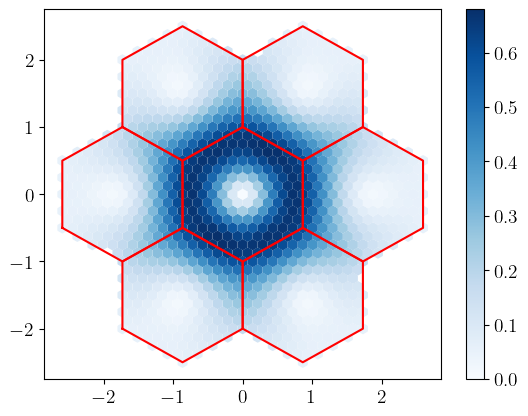

In [59]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=resden, marker='h', s=50, cmap='Blues')
plt.colorbar()

In [63]:
phiT=1
T=0.001
res_phi_den=[]
res_phi_den_back=[]
Phis=np.linspace(0,0.001, 12)
for phiT in Phis:
    # res_long=long_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_long.append(res_long)
    
    res_den=dens_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )
    res_phi_den_back.append(res_den)

starting bubble.......
time for bubble... 0.0688009262084961
starting bubble.......
time for bubble... 0.08634400367736816
starting bubble.......
time for bubble... 0.09543108940124512
starting bubble.......
time for bubble... 0.08523917198181152
starting bubble.......
time for bubble... 0.07261800765991211
starting bubble.......
time for bubble... 0.06818199157714844
starting bubble.......
time for bubble... 0.07081294059753418
starting bubble.......
time for bubble... 0.06770992279052734
starting bubble.......
time for bubble... 0.06647014617919922
starting bubble.......
time for bubble... 0.06797909736633301
starting bubble.......
time for bubble... 0.06638002395629883
starting bubble.......
time for bubble... 0.06787109375


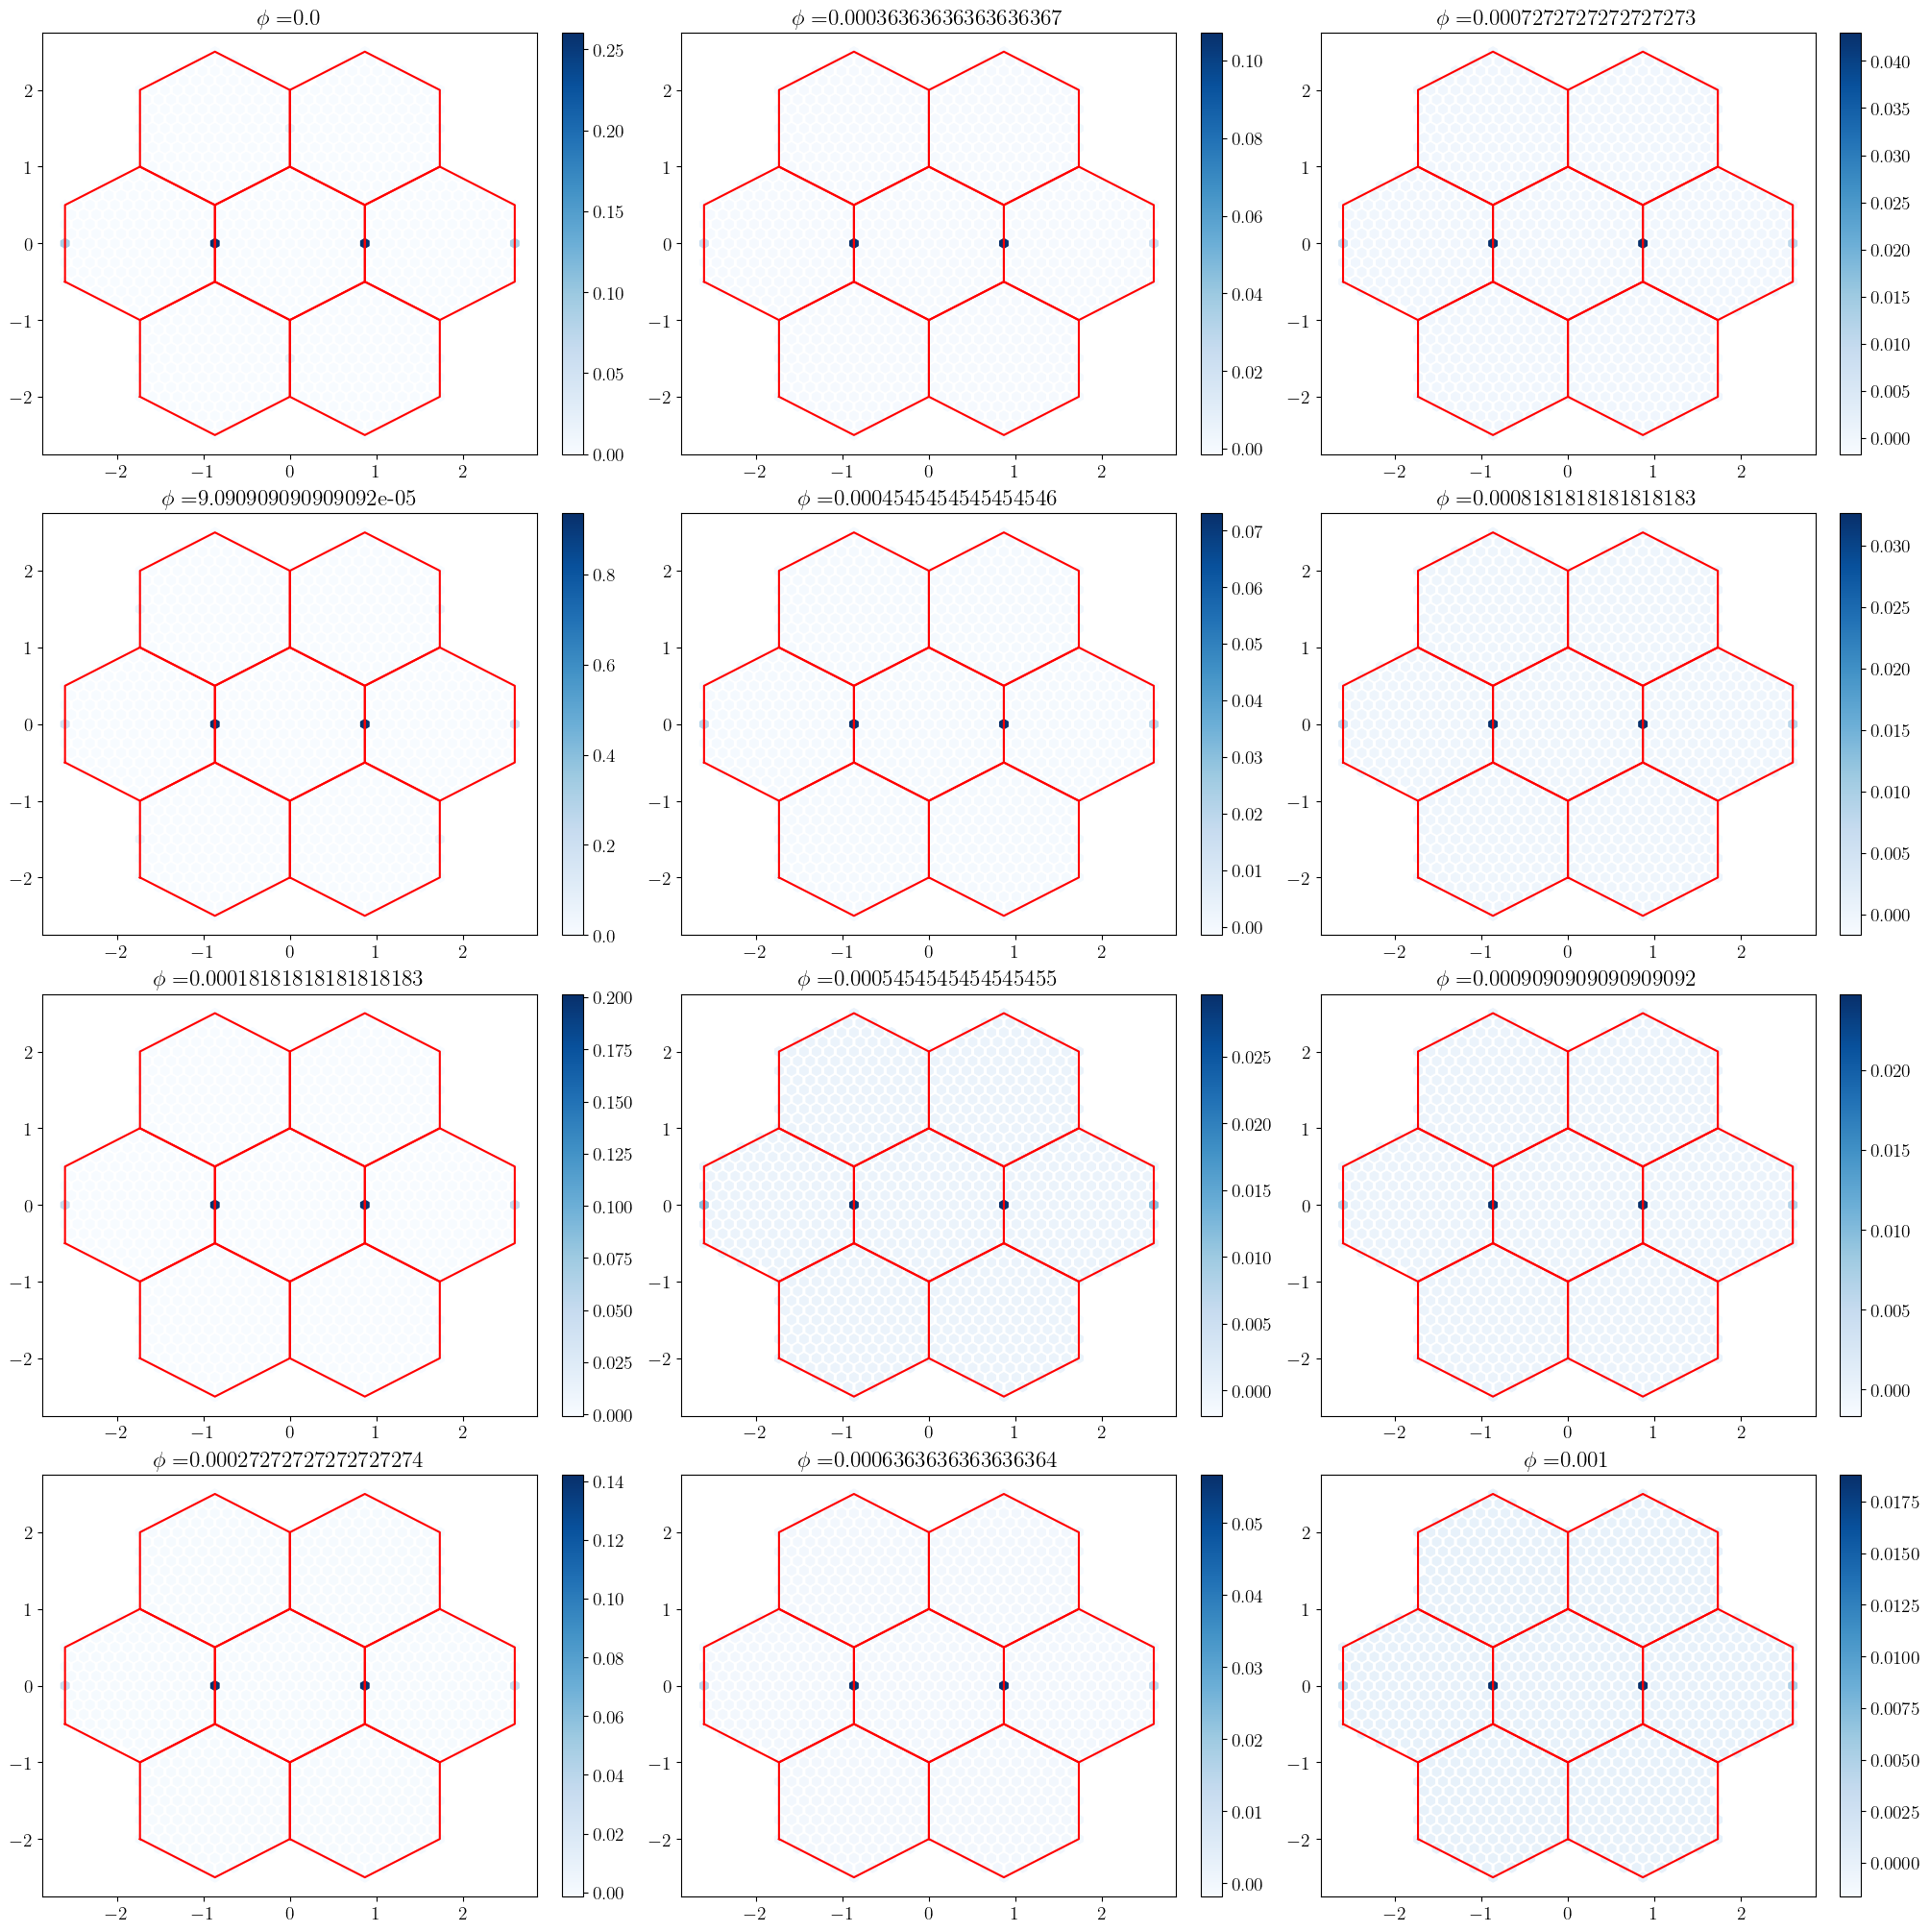

In [64]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20), layout="constrained")


bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for i,phiT in enumerate(Phis):
    row = int( i % 4)
    col = int( (i - row) / 4 )
    for mult in mults:
        axs[row, col].plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

    axs[row, col].set_title(r'$\phi=$'+str(phiT))
    # plt.scatter(B1.latt.KX,B1.latt.KY, c=res_phi_trans[i]+np.real(res_phi_trans_back[i]), marker='h', s=50, cmap='Blues_r')
    sc=axs[row, col].scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_phi_den_back[i]), marker='h', s=50, cmap='Blues')
    plt.colorbar(sc, ax = axs[row, col])
plt.show()

In [65]:
phiT=1
T=0.001
res_phi_den=[]
res_phi_den_back=[]
Phis=np.linspace(0,0.1, 64)

for phiT in Phis:
    # res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
    # res_phi_trans.append(res_t)
    
    res_t=dens_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )
    res_phi_den_back.append(res_t)

starting bubble.......
time for bubble... 0.0672597885131836
starting bubble.......
time for bubble... 0.08588790893554688
starting bubble.......
time for bubble... 0.10222005844116211
starting bubble.......
time for bubble... 0.08981680870056152
starting bubble.......
time for bubble... 0.0657510757446289
starting bubble.......
time for bubble... 0.0691080093383789
starting bubble.......
time for bubble... 0.07695198059082031
starting bubble.......
time for bubble... 0.0716409683227539
starting bubble.......
time for bubble... 0.07016801834106445
starting bubble.......
time for bubble... 0.07379722595214844
starting bubble.......
time for bubble... 0.07054901123046875
starting bubble.......
time for bubble... 0.07012295722961426
starting bubble.......
time for bubble... 0.07293891906738281
starting bubble.......
time for bubble... 0.07117700576782227
starting bubble.......
time for bubble... 0.07031035423278809
starting bubble.......
time for bubble... 0.07820487022399902
starting bub

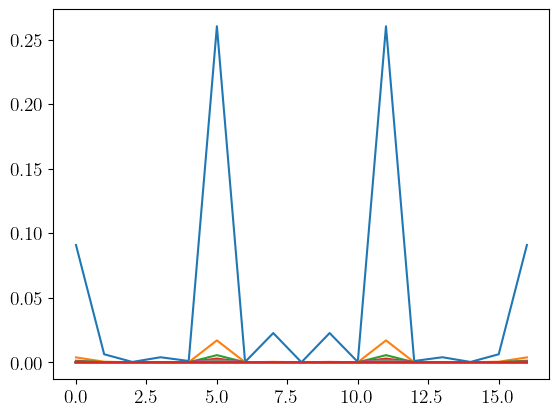

-2.598076211353314 -3.1086244689504383e-15
-1.7320508075688752 -1.5000000000000033
-1.7320508075688759 -2.220446049250313e-15
-1.7320508075688763 1.4999999999999991
-0.8660254037844393 -1.4999999999999996
-0.8660254037844379 -1.1102230246251565e-15
-0.8660254037844384 1.5000000000000002
2.220446049250313e-16 -1.4999999999999987
0.0 0.0
-2.886579864025407e-15 1.5
0.8660254037844395 -1.4999999999999978
0.8660254037844387 0.0
0.8660254037844358 1.5
1.7320508075688787 -1.499999999999997
1.7320508075688774 0.0
1.7320508075688745 1.5
2.598076211353316 0.0


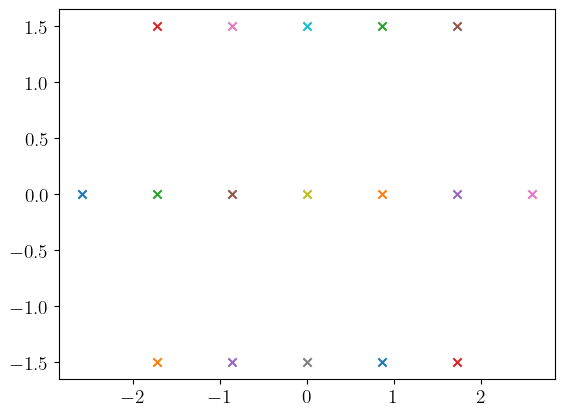

In [66]:


bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
peaks=[]
for i,phiT in enumerate(Phis):

    plt.plot(np.abs(res_phi_den_back[i])[dens_corr.IGinq])
    peaks.append(np.abs(res_phi_den_back[i])[dens_corr.IGinq])
plt.show()
for i in dens_corr.IGinq:
    print(B1.latt.KX[i],B1.latt.KY[i])
    plt.scatter([B1.latt.KX[i]],[B1.latt.KY[i]], marker='x')

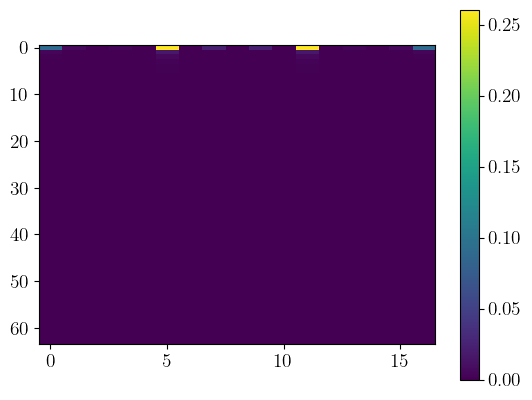

In [70]:
plt.imshow((peaks), aspect=1/5)
plt.colorbar()